# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_recall_curve,roc_curve,classification_report,confusion_matrix,f1_score
from sklearn.metrics import mean_squared_error
from matplotlib import style
from sklearn.metrics import precision_score,recall_score
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# Create a DataFrame

In [2]:
df=pd.read_csv('bank.csv',sep=';')
print(df.shape)
df.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Labelize The Target column(Y)

In [3]:
le=LabelEncoder()
df['y']=le.fit_transform(df['y'])

<AxesSubplot:xlabel='y', ylabel='count'>

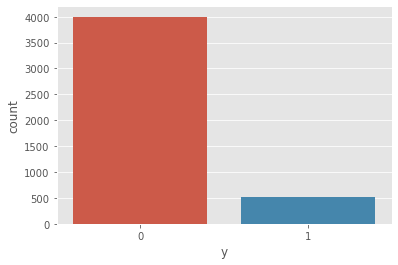

In [4]:
sns.countplot(df['y'])

# Exploratory Data Analysis

Question#1:Which Age Group people subscribed the most?<br>
Question#2:What is the education level of most of the subscribers?<br>
Question#3:What is the bank balance of most of the subscribers?<br>
Questtion#4:What is the loan applying percentage of the subscribers?<br>
Question#5:What is the job type of most subscribers?<br>
Question#6:What is the martial status of most subscribers?<br>
Question#7:Those who subscribed the most has credit in default or not?<br>
Question#8:On which day and month people subscribes the most?<br>
Question#9:What was the  outcomes of the previous marketing compaign ,if it failed then why it heppened?

## Pairplot with hue target column

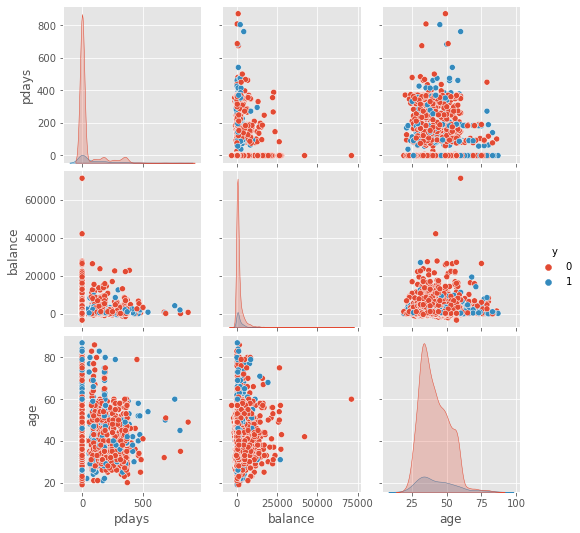

In [5]:
sns.pairplot(df[['pdays','balance','age','y']],hue="y")

> # Question#1:Which Age Group people subscribed the most?


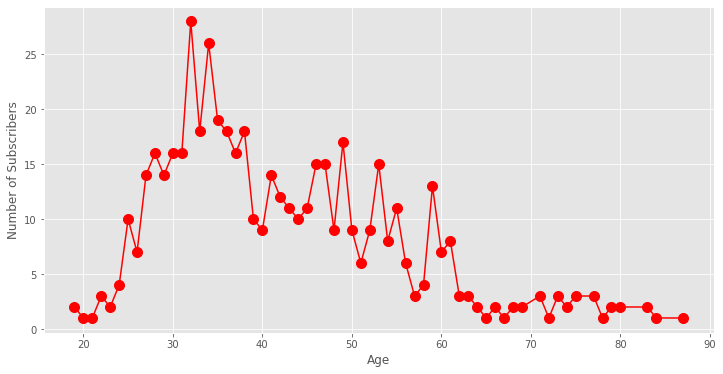

Text(0, 0.5, 'Balance')

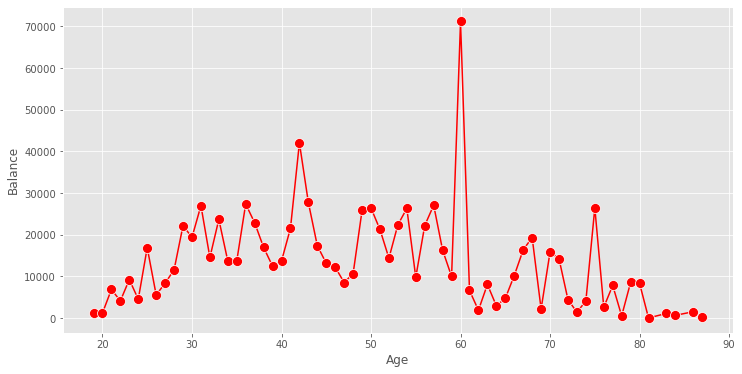

In [6]:
results=df.groupby(df['age']).agg('max').reset_index()
result1=df[df['y']==1].groupby(df['age'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(result1['age'],result1['y'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Age')
plt.ylabel('Number of Subscribers')
plt.show()
plt.figure(figsize=(12,6))
sns.lineplot(results['age'],results['balance'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Age')
plt.ylabel('Balance')

**Results:**<br>
1)People who have ages between 30 to 40 subscribed the most.<br>
2)People who have ages between 40  to 60 have the high balance.

> # Question#2:What is the education level of most of the subscribers?

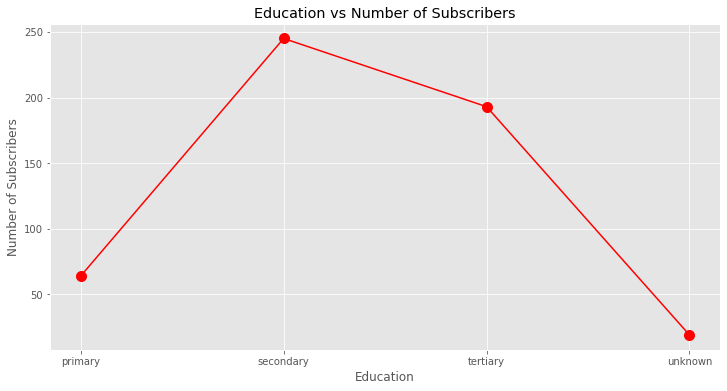

In [7]:
results4=df[df['y']==1].groupby(df['education'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(results4['education'],results4['y'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.title('Education vs Number of Subscribers')
plt.xlabel('Education')
plt.ylabel('Number of Subscribers')
plt.show()

*Results:*<br>
people who have secondary education level subscribed the most.


> # Question#3:What is the bank balance of most of the subscribers?

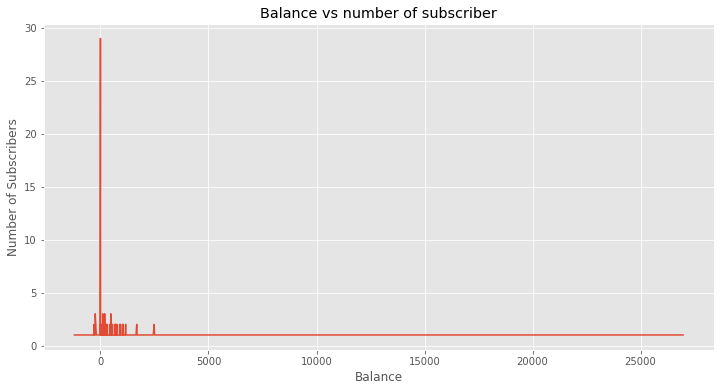

In [8]:
results3=df[df['y']==1].groupby(df['balance'])[['y','age']].count().reset_index()
plt.figure(figsize=(12,6))
plt.plot(results3['balance'],results3['y'])
plt.title('Balance vs number of subscriber')
plt.xlabel('Balance')
plt.ylabel('Number of Subscribers')
plt.show()

*Results:*<br>
people who have bank balance is zero subscribed the most.

> # Questtion#4:What is the loan applying percentage of the subscribers?

Text(0, 0.5, 'Number of Subscribers')

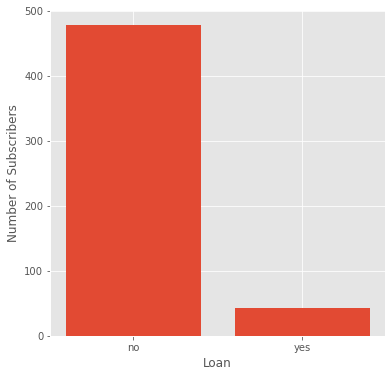

In [9]:
results5=df[df['y']==1].groupby(df['loan'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(6,6))
plt.bar(results5['loan'],results5['y'])
plt.xlabel('Loan')
plt.ylabel('Number of Subscribers')

*Results:*<br>
Most subscribers did not apply for the loan

> # Question#5:What is the job type of most subscribers?

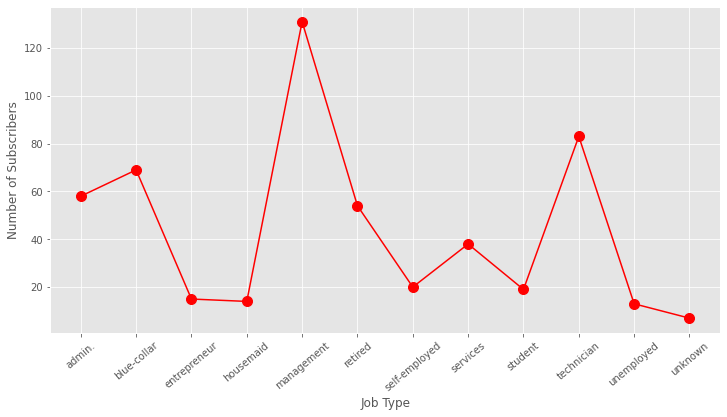

In [10]:
results6=df[df['y']==1].groupby(df['job'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(results6['job'],results6['y'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xticks(rotation=40)
plt.xlabel('Job Type')
plt.ylabel('Number of Subscribers')
plt.show()

*Results:*<br>
people who have job type is management, subscribed the most.

> # Question#6:What is the martial status of most subscribers?

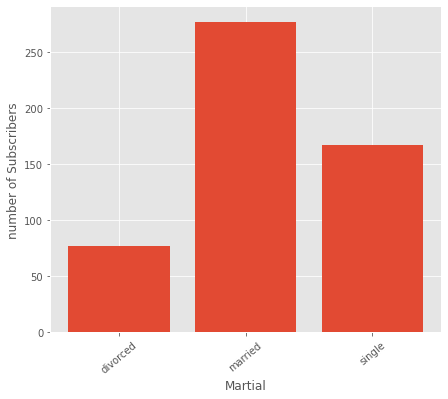

In [11]:
results7=df[df['y']==1].groupby(df['marital'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(7,6))
plt.bar(results7['marital'],results7['y'])
plt.xticks(rotation=40)
plt.xlabel('Martial')
plt.ylabel('number of Subscribers')
plt.show()

*Result:*<br>
Married people subscribed the most.

> # Question#7:Those who subscribed the most has credit in default or not?

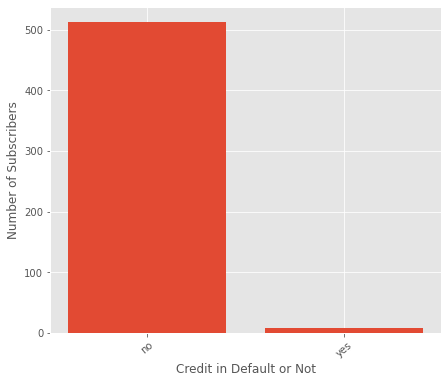

In [12]:
results8=df[df['y']==1].groupby(df['default'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(7,6))
plt.bar(results8['default'],results8['y'])
plt.xticks(rotation=40)
plt.xlabel('Credit in Default or Not')
plt.ylabel('Number of Subscribers')
plt.show()

*Result:*<br>
people who have no credit in default subscribed th most.

> # Question#8:On which day and month people subscribes the most?

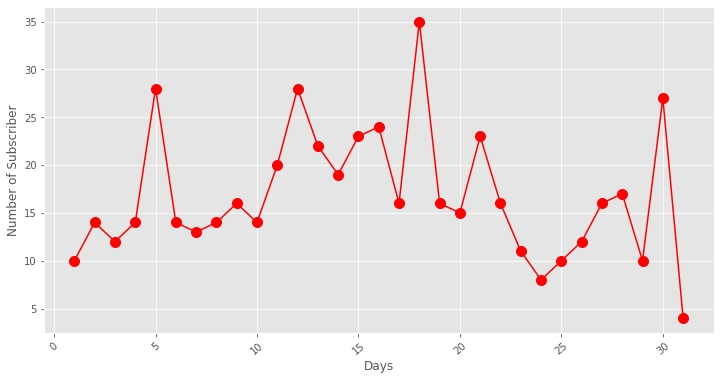

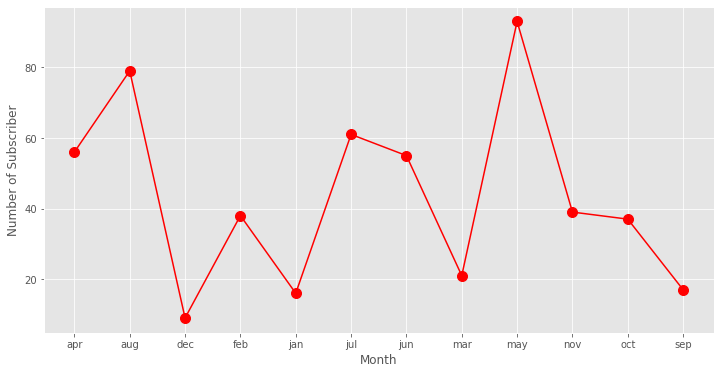

In [13]:
results10=df[df['y']==1].groupby(df['day'])[['y','balance']].sum().reset_index()
results2=df[df['y']==1].groupby(df['month'])[['y','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(results10['day'],results10['y'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Days')
plt.ylabel('Number of Subscriber')
plt.xticks(rotation=40)
plt.figure(figsize=(12,6))
plt.plot(results2['month'],results2['y'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Month')
plt.ylabel('Number of Subscriber')
plt.show()

*Result:*<br>
The day between 16 to 19 and in month may got most subscribers.

> # Question#9:What was the outcomes of the previous marketing compaign ,if it failed then why it heppened?

In [14]:
pivot_columns = ['education','poutcome','balance','age','month']
pv_df = df[pivot_columns]
pivot_table = pv_df.pivot(values=['balance','age'],columns=['poutcome'])
pivot_table = pivot_table.fillna(0)
pivot_table.head(4)

balance                           age                      
poutcome failure other success unknown failure other success unknown
0            0.0   0.0     0.0  1787.0     0.0   0.0     0.0    30.0
1         4789.0   0.0     0.0     0.0    33.0   0.0     0.0     0.0
2         1350.0   0.0     0.0     0.0    35.0   0.0     0.0     0.0
3            0.0   0.0     0.0  1476.0     0.0   0.0     0.0    30.0

Text(0, 0.5, 'Age')

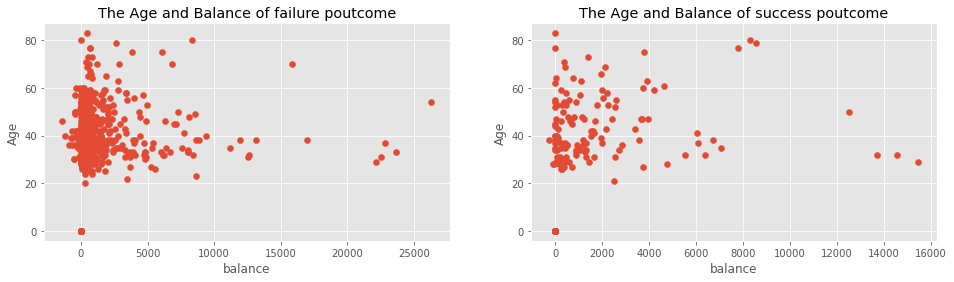

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.scatter(pivot_table['balance','failure'],pivot_table['age','failure'])
ax1.set_xlabel('balance')
ax1.set_ylabel('Age')
ax1.set_title('The Age and Balance of failure poutcome')
ax2.scatter(pivot_table['balance','success'],pivot_table['age','success'])
ax2.set_title('The Age and Balance of success poutcome')
ax2.set_xlabel('balance')
ax2.set_ylabel('Age')

I think compaigns failed due to Zero balance

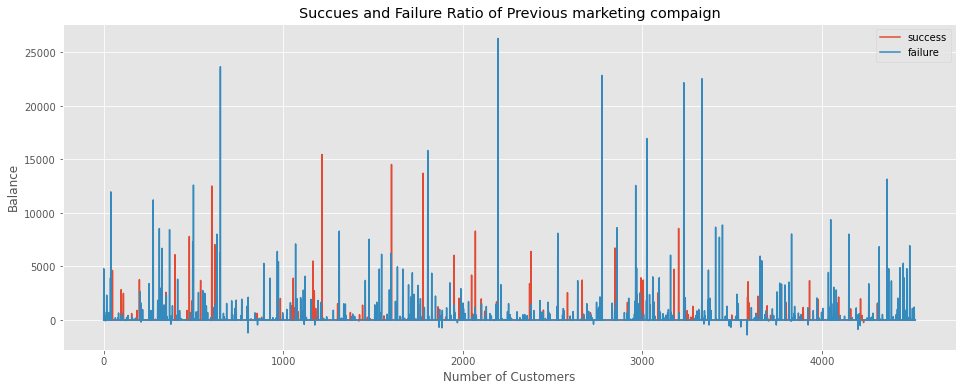

In [16]:
plt.figure(figsize=(16,6))
pivot_table['balance','success'].plot(label='success')
pivot_table['balance','failure'].plot(label='failure')
plt.title('Succues and Failure Ratio of Previous marketing compaign')
plt.xlabel('Number of Customers')
plt.ylabel('Balance')
plt.legend()

## Correlation Testing

In [17]:
mask=np.zeros_like(df.corr())
triangle_indeces=np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

# Heat map for correlation testing

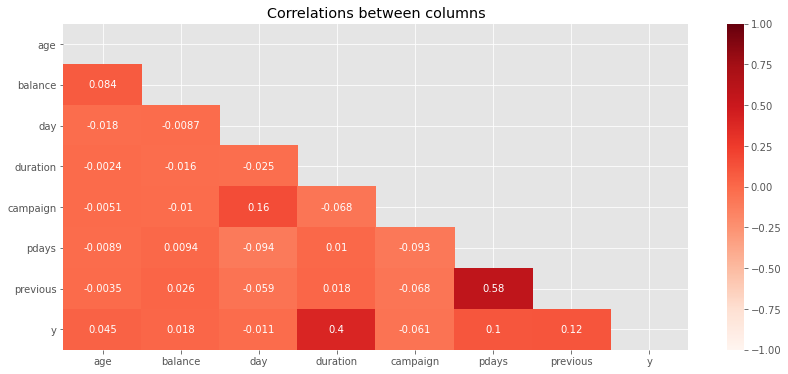

In [18]:
#sns.set_context('white')
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),mask=mask,annot = True,vmin=-1, vmax=1,annot_kws={"size":10},cmap='Reds')
plt.title("Correlations between columns")
plt.grid()
plt.show()

If Correlation is near to <font color='green'>1</font> then it means columns have Strong Positve Correlation.<br>
If Correlation is near to <font color='green'>-1</font> then it means columns have strong negative Correlation with eachother.<br>
If Correlation is near to <font color='green'>0</font> then it means Columns have very weak correlation with each other.<br>
pdays have <font color='green'>Strong postive</font> correlation wtih previous

## Outilers Detection

Text(0.5, 1.0, 'duration contains many outliers')

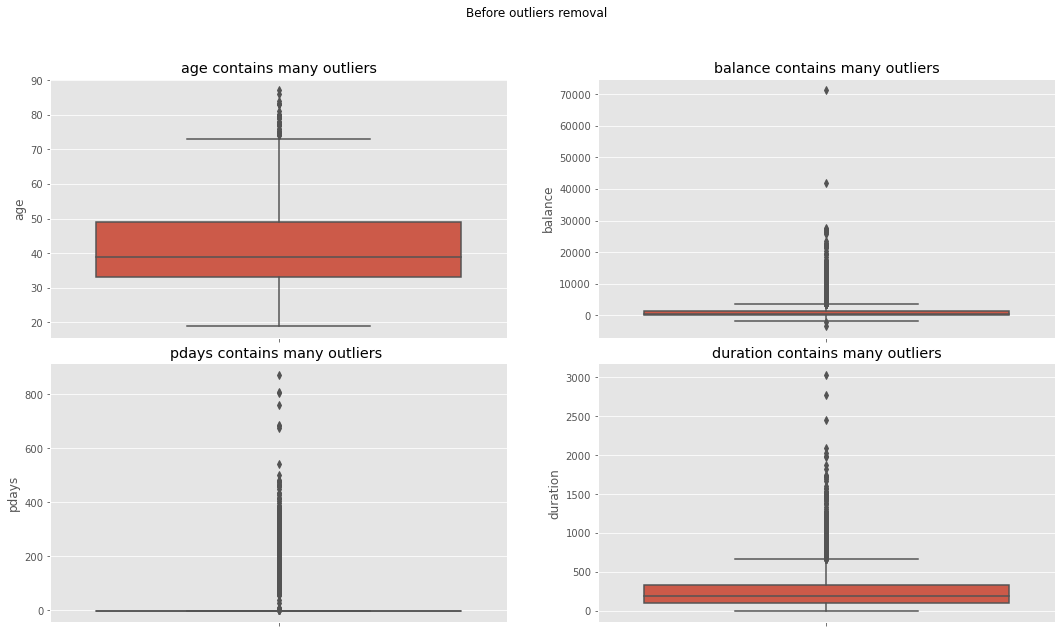

In [19]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(hspace=0.1,wspace=0.2)
fig.suptitle("Before outliers removal")
ax=ax.flatten()
sns.boxplot(y=df["age"],ax=ax[0])
sns.boxplot(y=df["balance"],ax=ax[1])
sns.boxplot(y=df["pdays"],ax=ax[2])
sns.boxplot(y=df["duration"],ax=ax[3])
ax[0].set_title("age contains many outliers")
ax[1].set_title("balance contains many outliers")
ax[2].set_title("pdays contains many outliers ")
ax[3].set_title("duration contains many outliers")

# Z_score methode to remove the outliers

In [20]:
df1=df[~((df["age"]>df["age"].mean() + 2 * df["age"].std())|(df["age"]<df["age"].mean() - 2 * df["age"].std()))]
df2=df1[~((df1["balance"]>df1["balance"].mean() + 2 * df1["balance"].std())|(df1["balance"]<df1["balance"].mean() - 2 * df1["balance"].std()))]
df3=df2[~((df2["pdays"]>df2["pdays"].mean() + 2 * df2["pdays"].std())|(df2["pdays"]<df2["pdays"].mean() - 2 * df2["pdays"].std()))]
df4=df3[~((df3["duration"]>df3["duration"].mean() + 2 * df3["duration"].std())|(df3["duration"]<df3["duration"].mean() - 2 * df3["duration"].std()))]

In [21]:
df_clean = df4.copy()

# After Outliers detection

Text(0.5, 1.0, 'duration Does not contains Outliers')

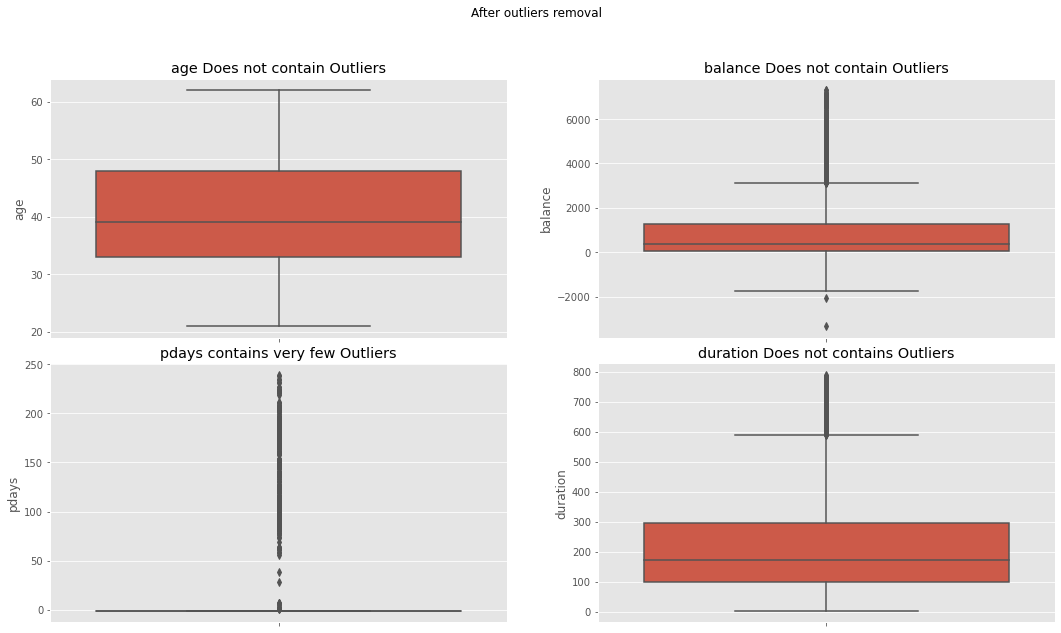

In [22]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(hspace=0.1,wspace=0.2)
fig.suptitle("After outliers removal")
ax=ax.flatten()
sns.boxplot(y=df_clean["age"],ax=ax[0])
sns.boxplot(y=df_clean["balance"],ax=ax[1])
sns.boxplot(y=df_clean["pdays"],ax=ax[2])
sns.boxplot(y=df_clean["duration"],ax=ax[3])
ax[0].set_title("age Does not contain Outliers")
ax[1].set_title("balance Does not contain Outliers")
ax[2].set_title("pdays contains very few Outliers")
ax[3].set_title("duration Does not contains Outliers")

## Normal Distribution

Before Boxcox Transformation


Text(0.5, 1.0, 'Skew of Age column:0.33761495741157005')

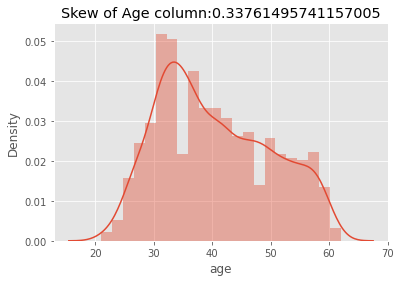

In [23]:
sns.distplot(df_clean["age"])
print("Before Boxcox Transformation")
plt.title("Skew of Age column:"+str(df_clean['age'].skew()))

# Box_Cox transfromation

In [24]:
boxcox1=PowerTransformer('box-cox').fit_transform(df_clean[["age"]])
df_clean["age"]=boxcox1

After Boxcox Transformation


Text(0.5, 1.0, 'Skew of Age column:-0.005351247799414163')

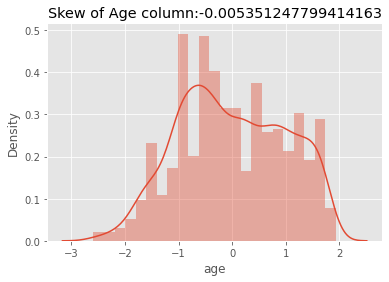

In [25]:
sns.distplot(df_clean["age"])
print("After Boxcox Transformation")
plt.title("Skew of Age column:"+str(df_clean['age'].skew()))

# Hot labelEncoder for labeling the data

In [26]:
object_columns =[]
for i in df_clean.columns:
    if df_clean[i].dtype == 'object':
        object_columns.append(i)
    

In [27]:
le=LabelEncoder()
for i in object_columns:
      df_clean[i]=le.fit_transform(df_clean[i])


# Now the data is clean and ready for prediction

In [28]:
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.139332,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
3,-1.139332,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,1.720514,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,-0.500398,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
7,-0.047372,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.872739,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,3,0
4516,-0.745168,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,1.571107,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,1.571107,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0


# Creating X and Y variable for fiting process

In [29]:
X=df_clean.drop('y',axis=1)
y=df_clean['y']

# Transforming the Imbalance data

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sam,y_sam = smote.fit_resample(X,y)

In [31]:
print("x_sam Shape: ",x_sam.shape)
print("y_sam Shape: ",y_sam.shape)

x_sam Shape:  (6824, 16)
y_sam Shape:  (6824,)


### Feature Scaling

In [32]:
Scaler=StandardScaler()
X_sam_Scale=Scaler.fit_transform(x_sam)

### Spliting data into train and test

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_sam_Scale,y_sam,test_size=0.3)

# DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_dtc)

0.912109375

### hyperparameter tuning

In [37]:
params={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}
model_dct=DecisionTreeClassifier()
model_dct_CV=GridSearchCV(model_dct,
                          param_grid=params,
                          cv=5,verbose=1,
                          n_jobs=-1)
model_dct_CV.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

### Model Evaluation

In [38]:

print('Best criterion :', model_dct_CV.best_estimator_.get_params()['criterion'])
print('Best max_depth Value :', model_dct_CV.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split Value :', model_dct_CV.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf Value :', model_dct_CV.best_estimator_.get_params()['max_depth'])
print("-------------------------")
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_dct_CV.best_score_:.3f}'
)

Best criterion : gini
Best max_depth Value : 9
Best min_samples_split Value : 2
Best min_samples_leaf Value : 9
-------------------------
Mean cross-validated accuracy score of the best_estimator: 0.882


### model with best parameters

In [39]:
dtc=DecisionTreeClassifier(criterion='gini',
                           max_depth=9,
                          min_samples_split=2,
                          min_samples_leaf=9)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
print('Precision of the model'+str(precision_score(y_test,y_pred_dtc)))
print('Accuracy of the model'+str(accuracy_score(y_test,y_pred_dtc)))
print('Recall of the model'+str(recall_score(y_test,y_pred_dtc)))

Precision of the model0.8411131059245961
Accuracy of the model0.87646484375
Recall of the model0.9249753208292202


### Classification report

In [40]:
target_names = ["Not Deposit","Deposit"]
CR_dtc=classification_report(y_test,y_pred_dtc,target_names=target_names)
print(CR_dtc)

              precision    recall  f1-score   support

 Not Deposit       0.92      0.83      0.87      1035
     Deposit       0.84      0.92      0.88      1013

    accuracy                           0.88      2048
   macro avg       0.88      0.88      0.88      2048
weighted avg       0.88      0.88      0.88      2048



### Confusion matric

[Text(0, 0.5, 'Not '), Text(0, 1.5, 'Yes')]

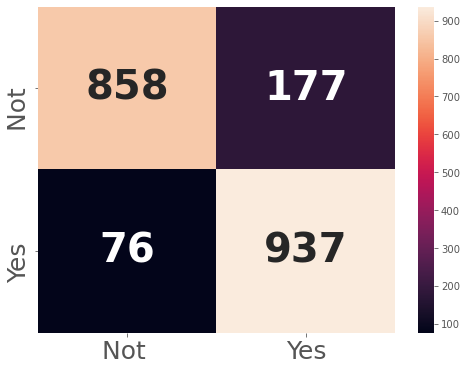

In [41]:
cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(8,6))
ax=x=sns.heatmap(cm,annot=True,fmt='d',cmap='rocket',annot_kws={'size':40,'weight':'bold'})
Labels=['Not ','Yes']
ax.set_xticklabels(Labels,fontsize=25)
ax.set_yticklabels(Labels,fontsize=25)

In [42]:
y_prob_dtc=dtc.predict_proba(X_test)

### Roc_curve decison tree

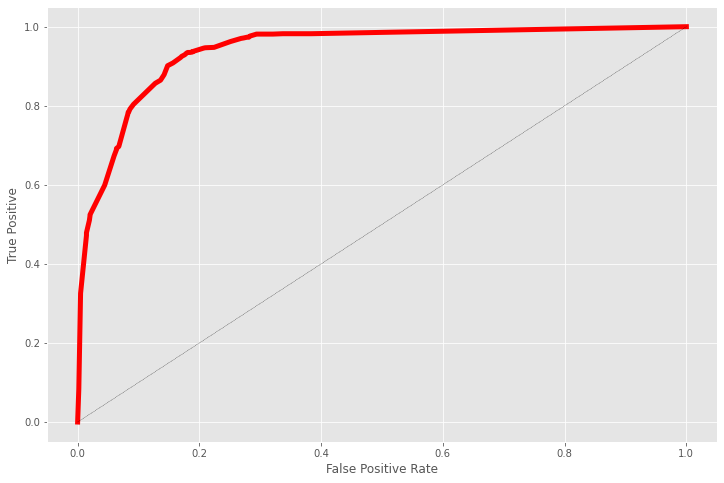

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob_dtc[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr, color = "red",linewidth=5)
plt.plot([0,1],[0,1],ls='--',color='black',lw=.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.title=("Roc Curve")

### Precision recall curve of decision tree

Text(0.5, 0, 'Precision')

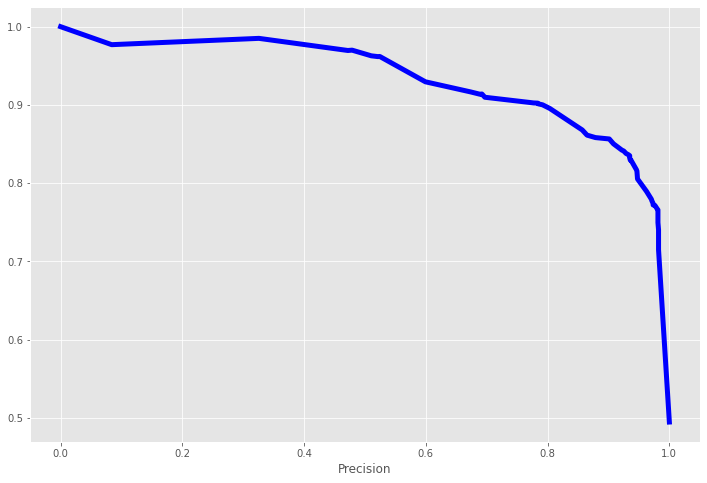

In [44]:
precision,recall,_= precision_recall_curve(y_test,y_prob_dtc[:,1])
plt.figure(figsize=(12,8))
plt.plot(recall,precision,color='blue',linewidth=5)
plt.xlabel('Recall')
plt.xlabel('Precision')

# **RandomForest Classifier:**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
accuracy_score(y_test,pred)

0.93896484375

### Hyperparameter tuning

In [47]:
params={
    "max_depth":[2, 8, 16],
    "n_estimators" :[64,128,200]
}
model_rf=RandomForestClassifier()
model_rf_CV=GridSearchCV(model_rf,
                          param_grid=params,
                          cv=5,
                          scoring='accuracy',
                          )
model_rf_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, 16],
                         'n_estimators': [64, 128, 200]},
             scoring='accuracy')

### Best hyperparametrs of random forest

In [48]:
print('Best max_depth:', model_rf_CV.best_estimator_.get_params()['max_depth'])
print('Best n_estimators:', model_rf_CV.best_estimator_.get_params()['n_estimators'])
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_rf_CV.best_score_:.3f}'
)

Best max_depth: 16
Best n_estimators: 200
Mean cross-validated accuracy score of the best_estimator: 0.940


In [49]:
rf=RandomForestClassifier(n_estimators=200,max_depth=8)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

# Model Evaluation

In [50]:
print("Accuracy of rf:",accuracy_score(y_test,y_pred_rf))
print("precision of rf:",precision_score(y_test,y_pred_rf,average='macro'))
print("Recall of rf:",recall_score(y_test,y_pred_rf))
print("f1_score of rf:",f1_score(y_test,y_pred_rf))
print("Mean_squared_error of rf",mean_squared_error(y_test,y_pred_rf))

Accuracy of rf: 0.888671875
precision of rf: 0.8894413378475821
Recall of rf: 0.912142152023692
f1_score of rf: 0.8901734104046244
Mean_squared_error of rf 0.111328125


### Classification report

In [51]:
target_names = ["Not subscribed","subscribed"]
CR_rfc=classification_report(y_test,y_pred_rf,target_names=target_names)
print(CR_rfc)

                precision    recall  f1-score   support

Not subscribed       0.91      0.87      0.89      1035
    subscribed       0.87      0.91      0.89      1013

      accuracy                           0.89      2048
     macro avg       0.89      0.89      0.89      2048
  weighted avg       0.89      0.89      0.89      2048



### Confusion matrics

[Text(0, 0.5, 'Not Subscribed'), Text(0, 1.5, 'Subscribed')]

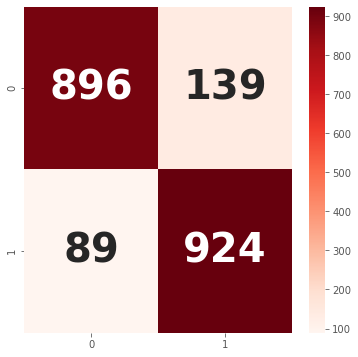

In [52]:
cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',annot_kws={'size':40,'weight':'bold'})
Labels=['Not Subscribed','Subscribed']
ax.set_xticklabels(Labels,fontsize=25)
ax.set_yticklabels(Labels,fontsize=25)

# Roc_Curve

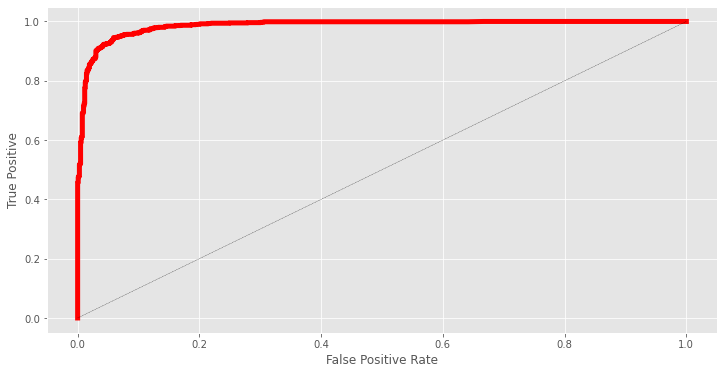

In [53]:
y_prob_rf=model_rf_CV.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_prob_rf[:,1])
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr, color = "red",linewidth=5)
plt.plot([0,1],[0,1],ls='--',color='black',lw=.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.title=("Roc Curve")

### Precision_Recall Curve Randomforest

Text(0.5, 0, 'Precision')

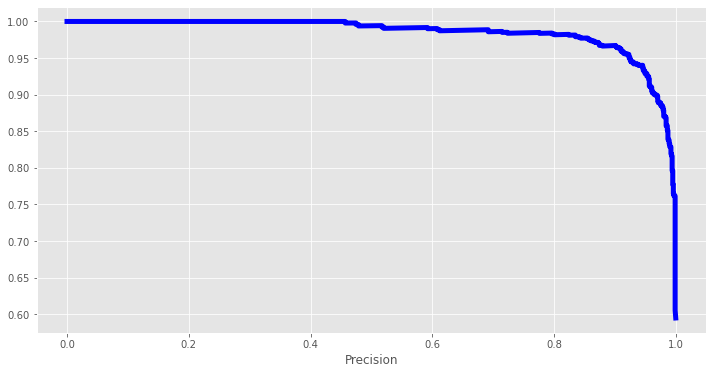

In [54]:
precision,recall,_= precision_recall_curve(y_test,y_prob_rf[:,1])
plt.figure(figsize=(12,6))
plt.plot(recall,precision,color='blue',linewidth=5)
plt.xlabel('Recall')
plt.xlabel('Precision')